# 220968280 - Anirudh Swaminathan - DSE A2

## Week 6 - Exercise 2 - SVM on income_evaluation.csv

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

### 2. Import dataset 

In [2]:
df = pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 3. Explore the data to gain insights about the data

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<Axes: xlabel='income', ylabel='count'>

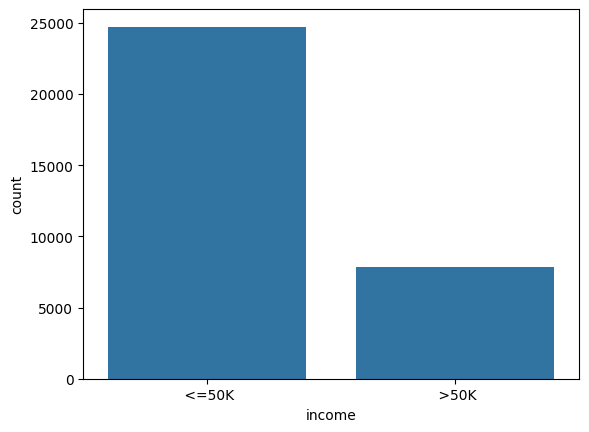

In [7]:
sns.countplot(x='income', data=df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [9]:
print(df['income'].value_counts(normalize=True) * 100)

income
0    75.919044
1    24.080956
Name: proportion, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'age'),
  Text(1, 0, 'workclass'),
  Text(2, 0, 'fnlwgt'),
  Text(3, 0, 'education'),
  Text(4, 0, 'education-num'),
  Text(5, 0, 'marital-status'),
  Text(6, 0, 'occupation'),
  Text(7, 0, 'relationship'),
  Text(8, 0, 'race'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'capital-gain'),
  Text(11, 0, 'capital-loss'),
  Text(12, 0, 'hours-per-week'),
  Text(13, 0, 'native-country'),
  Text(14, 0, 'income')])

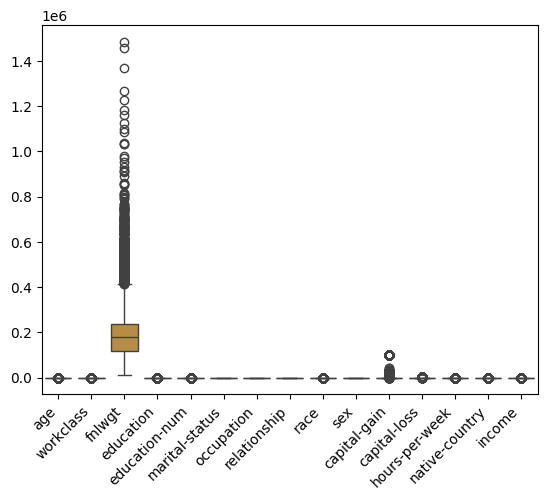

In [13]:
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')

### 4. Check the distribution of variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

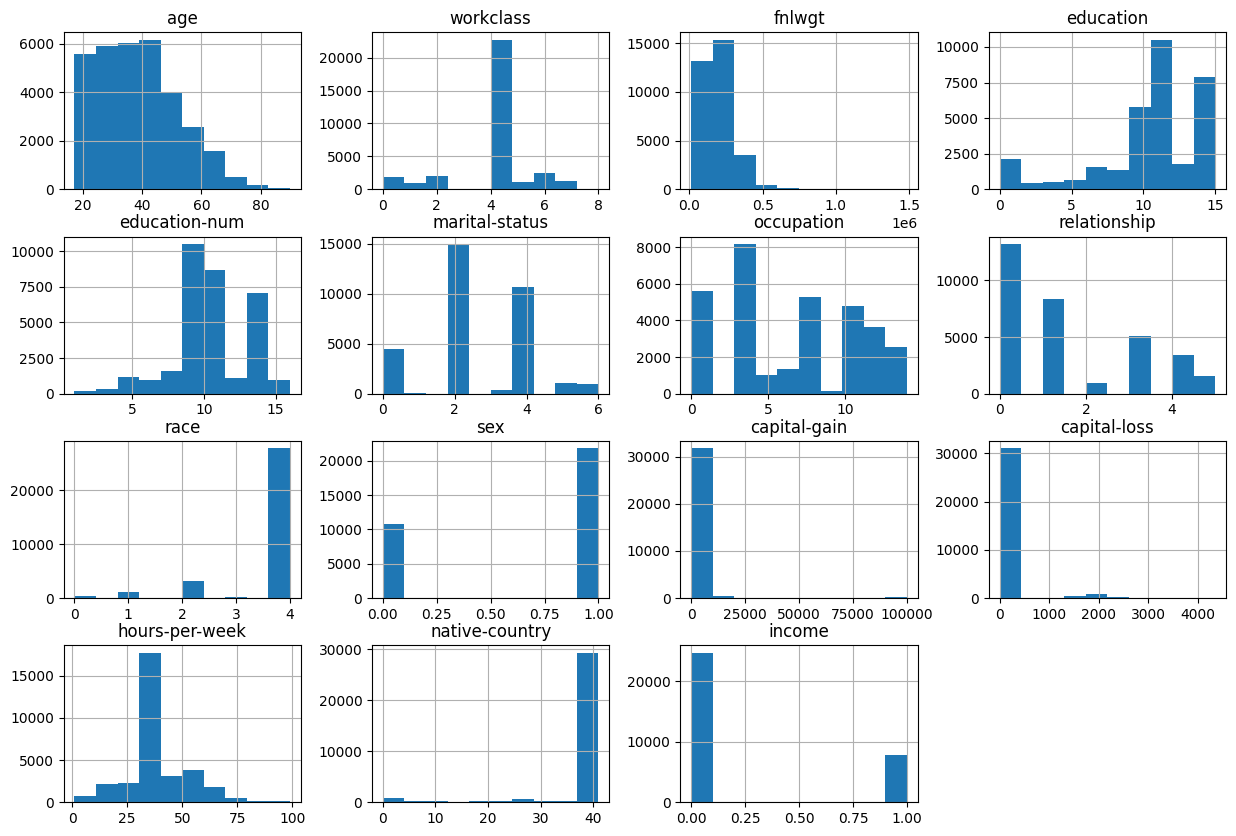

In [14]:
df.hist(figsize=(15, 10))

### 5. Split data into separate training and test set 

In [15]:
X = df.drop('income', axis=1)
y = df['income']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 6. Feature Scaling

In [17]:
stdscaler = preprocessing.StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [18]:
C_values = [1.0, 100.0, 1000.0]

### 7. 
### Run SVM with default hyperparameters 
### Run SVM with rbf kernel and C=1.0 and gamma=auto 
### Run SVM with rbf kernel and C=100.0
### Run SVM with rbf kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.8541154791154791
test accuracy: 0.8519807554509161
no underfitting or overfitting

confusion matrix: 
[[7023  435]
 [1011 1300]]


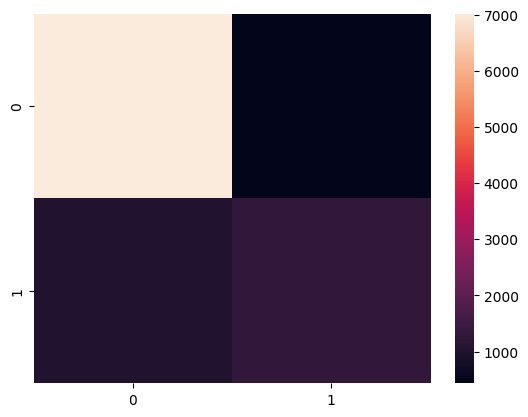

classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7458
           1       0.75      0.56      0.64      2311

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


classification accuracy: 0.8519807554509161
classification error: 0.14801924454908388


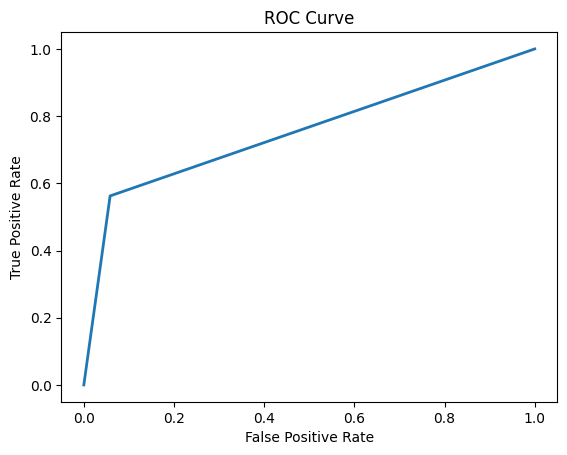

ROC AUC : 0.7521




train accuracy: 0.892023517023517
test accuracy: 0.8403111884532706
no underfitting or overfitting

confusion matrix: 
[[6839  619]
 [ 941 1370]]


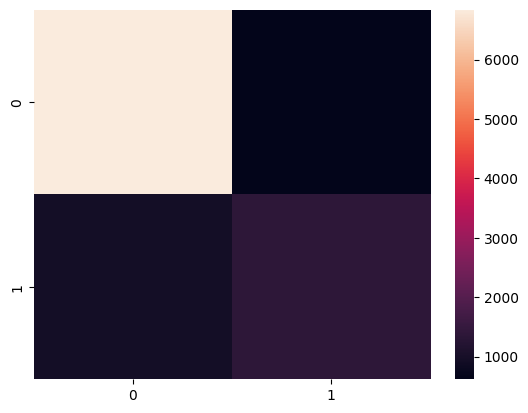

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7458
           1       0.69      0.59      0.64      2311

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.77      9769
weighted avg       0.83      0.84      0.84      9769


classification accuracy: 0.8403111884532706
classification error: 0.15968881154672943


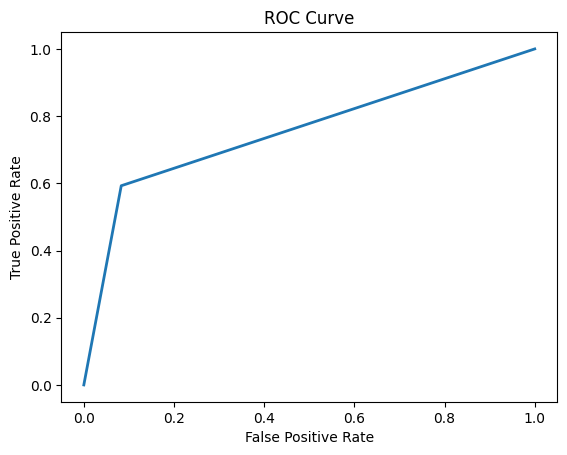

ROC AUC : 0.7549




train accuracy: 0.9155405405405406
test accuracy: 0.8283345275872659
no underfitting or overfitting

confusion matrix: 
[[6660  798]
 [ 879 1432]]


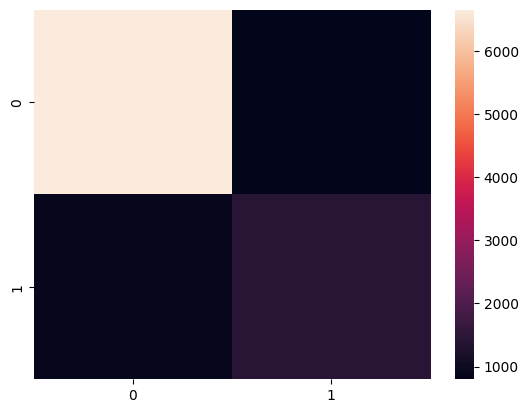

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7458
           1       0.64      0.62      0.63      2311

    accuracy                           0.83      9769
   macro avg       0.76      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769


classification accuracy: 0.8283345275872659
classification error: 0.1716654724127341


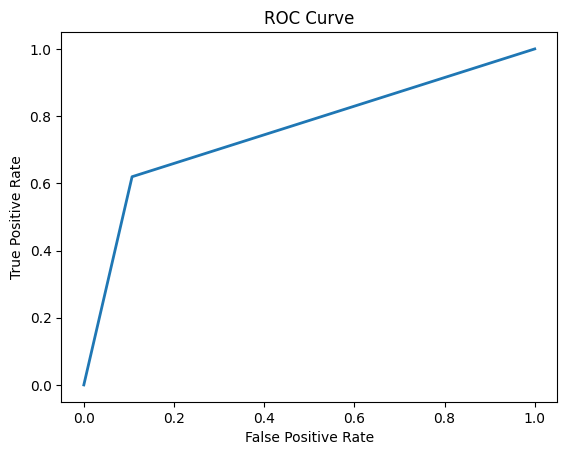

ROC AUC : 0.7563






In [19]:
for C in C_values:
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 8. 
### Run SVM with linear kernel
### Run SVM with linear kernel and C=1.0
### Run SVM with linear kernel and C=100.0
### Run SVM with linear kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.8127851877851878
test accuracy: 0.8203500870099294
no underfitting or overfitting

confusion matrix: 
[[7276  182]
 [1573  738]]


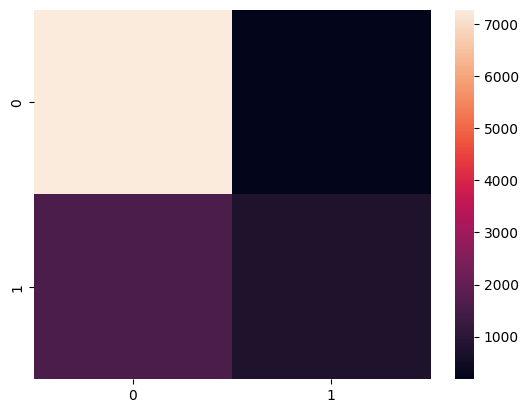

classification report: 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7458
           1       0.80      0.32      0.46      2311

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.67      9769
weighted avg       0.82      0.82      0.79      9769


classification accuracy: 0.8203500870099294
classification error: 0.1796499129900706


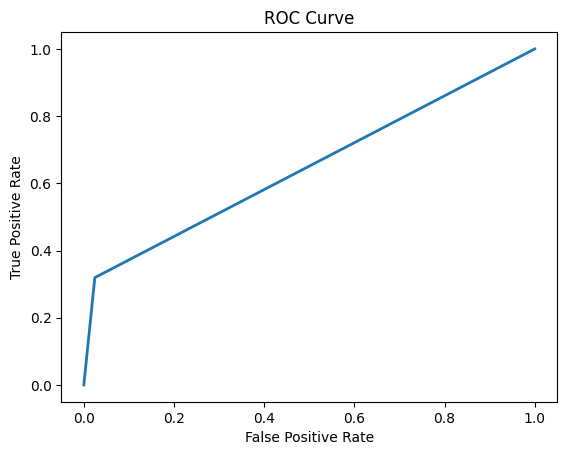

ROC AUC : 0.6475




train accuracy: 0.8128290628290629
test accuracy: 0.820247722387143
no underfitting or overfitting

confusion matrix: 
[[7275  183]
 [1573  738]]


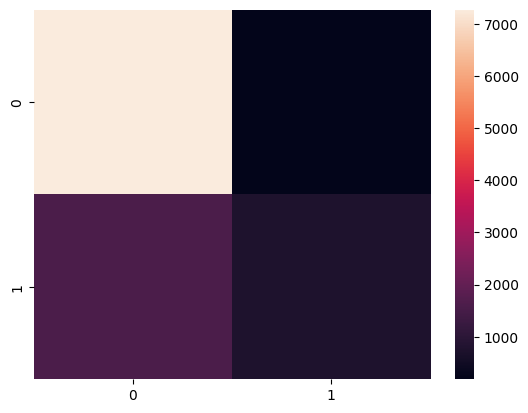

classification report: 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7458
           1       0.80      0.32      0.46      2311

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.67      9769
weighted avg       0.82      0.82      0.79      9769


classification accuracy: 0.820247722387143
classification error: 0.17975227761285695


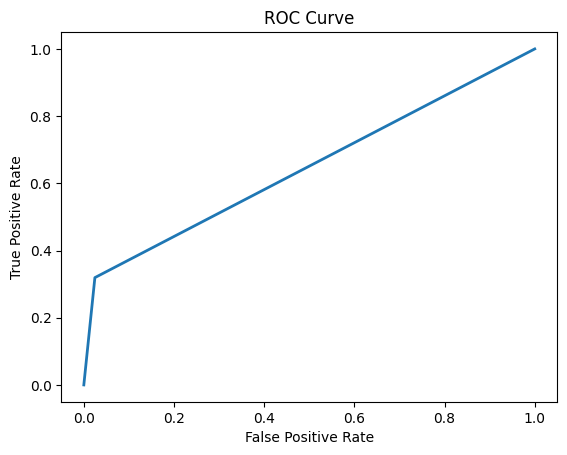

ROC AUC : 0.6474




train accuracy: 0.8126535626535627
test accuracy: 0.8203500870099294
no underfitting or overfitting

confusion matrix: 
[[7275  183]
 [1572  739]]


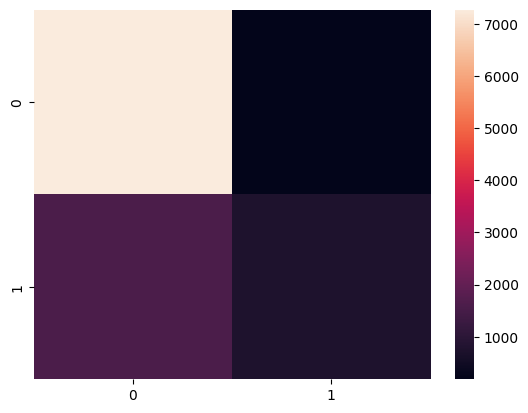

classification report: 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7458
           1       0.80      0.32      0.46      2311

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.67      9769
weighted avg       0.82      0.82      0.79      9769


classification accuracy: 0.8203500870099294
classification error: 0.1796499129900706


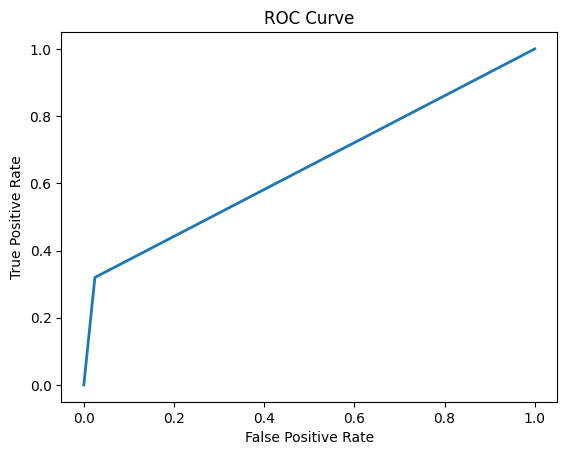

ROC AUC : 0.6476






In [20]:
for C in C_values:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 9. 
### Run SVM with polynomial kernel 
### Run SVM with poly kernel and C=1.0 and gamma=auto 
### Run SVM with poly kernel and C=100.0
### Run SVM with poly kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.8468760968760969
test accuracy: 0.8445081379875116
no underfitting or overfitting

confusion matrix: 
[[7060  398]
 [1121 1190]]


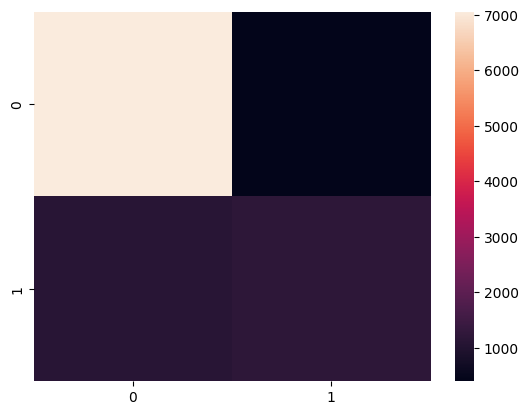

classification report: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7458
           1       0.75      0.51      0.61      2311

    accuracy                           0.84      9769
   macro avg       0.81      0.73      0.76      9769
weighted avg       0.84      0.84      0.83      9769


classification accuracy: 0.8445081379875116
classification error: 0.15549186201248844


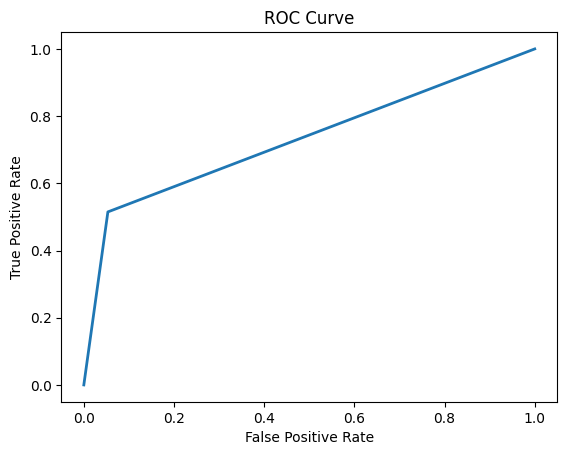

ROC AUC : 0.7308




train accuracy: 0.8512636012636012
test accuracy: 0.8462483365748797
no underfitting or overfitting

confusion matrix: 
[[6960  498]
 [1004 1307]]


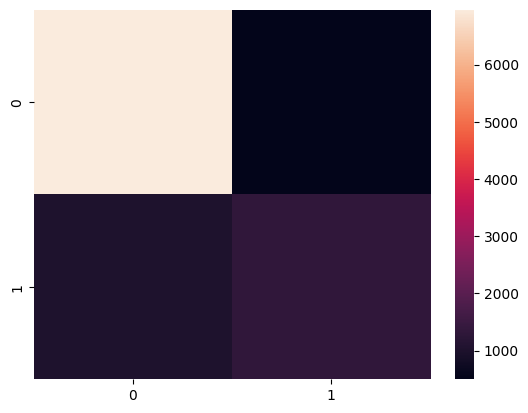

classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7458
           1       0.72      0.57      0.64      2311

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


classification accuracy: 0.8462483365748797
classification error: 0.15375166342512026


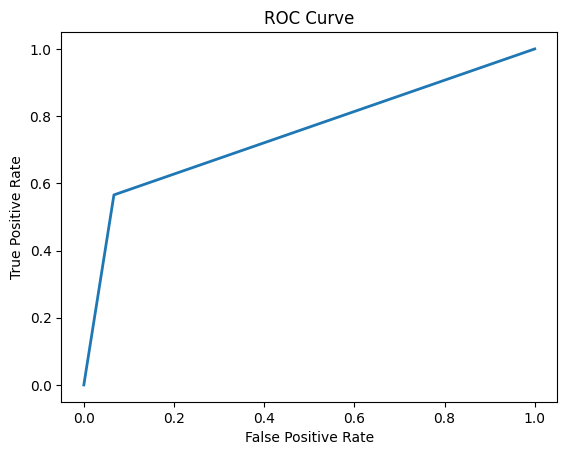

ROC AUC : 0.7494




train accuracy: 0.8517901017901018
test accuracy: 0.8477838059166752
no underfitting or overfitting

confusion matrix: 
[[6968  490]
 [ 997 1314]]


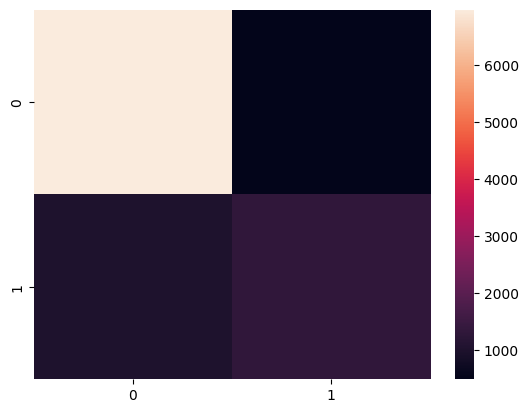

classification report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7458
           1       0.73      0.57      0.64      2311

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769


classification accuracy: 0.8477838059166752
classification error: 0.15221619408332476


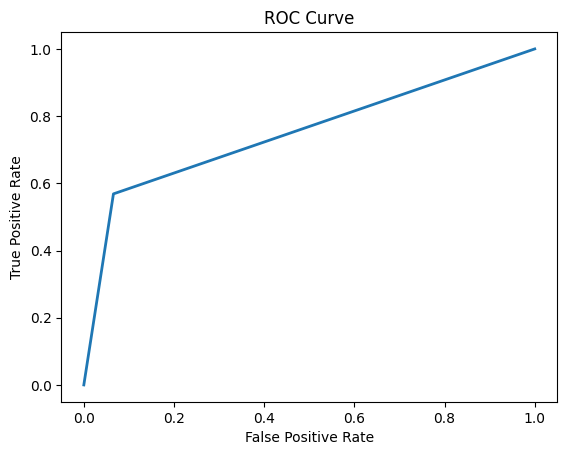

ROC AUC : 0.7514






In [21]:
for C in C_values:
    clf = svm.SVC(kernel='poly', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 10. 
### Run SVM with sigmoid kernel
### Run SVM with sigmoid kernel and C=1.0 and gamma=auto 
### Run SVM with sigmoid kernel and C=100.0
### Run SVM with sigmoid kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.7463583713583714
test accuracy: 0.744804995393592
no underfitting or overfitting

confusion matrix: 
[[6182 1276]
 [1217 1094]]


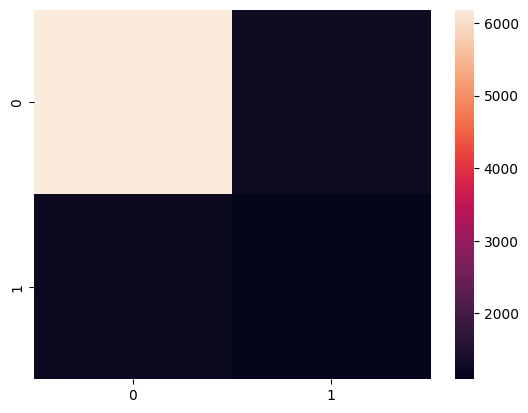

classification report: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      7458
           1       0.46      0.47      0.47      2311

    accuracy                           0.74      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.75      0.74      0.75      9769


classification accuracy: 0.744804995393592
classification error: 0.255195004606408


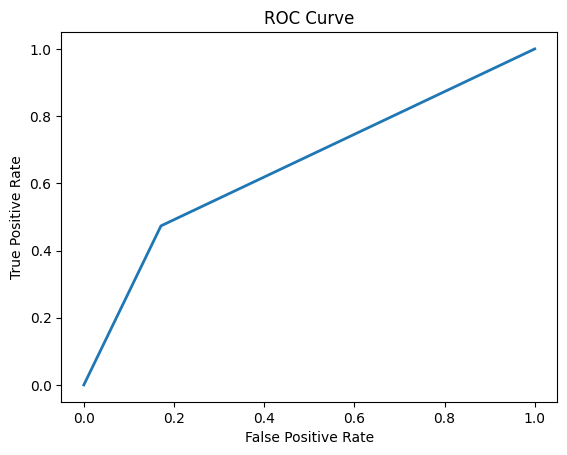

ROC AUC : 0.6511




train accuracy: 0.7452176202176202
test accuracy: 0.7424506090695056
no underfitting or overfitting

confusion matrix: 
[[6149 1309]
 [1207 1104]]


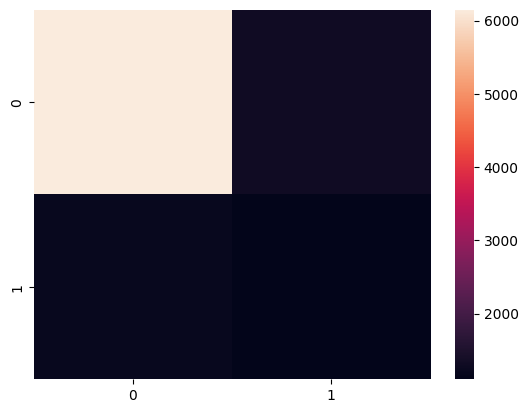

classification report: 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7458
           1       0.46      0.48      0.47      2311

    accuracy                           0.74      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.75      0.74      0.74      9769


classification accuracy: 0.7424506090695056
classification error: 0.25754939093049445


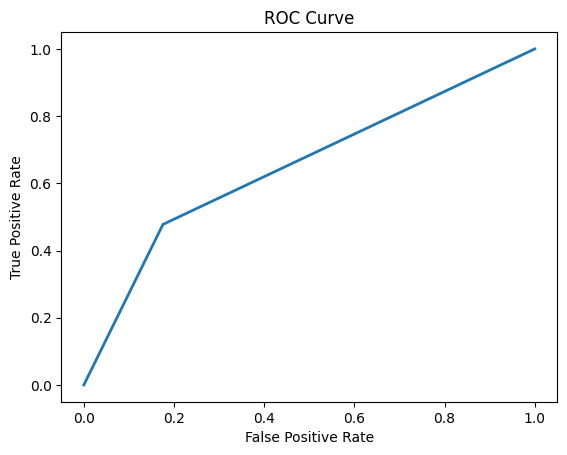

ROC AUC : 0.6511




train accuracy: 0.7441646191646192
test accuracy: 0.741734056710001
no underfitting or overfitting

confusion matrix: 
[[6157 1301]
 [1222 1089]]


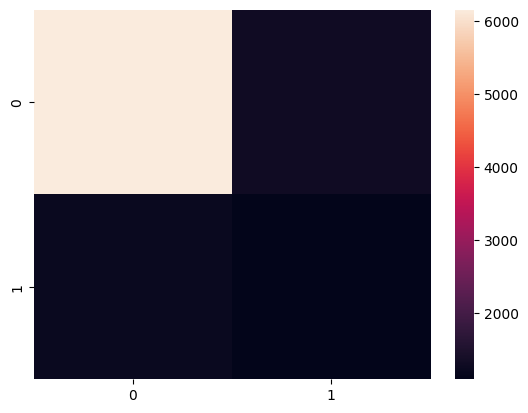

classification report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7458
           1       0.46      0.47      0.46      2311

    accuracy                           0.74      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.74      0.74      0.74      9769


classification accuracy: 0.741734056710001
classification error: 0.25826594328999897


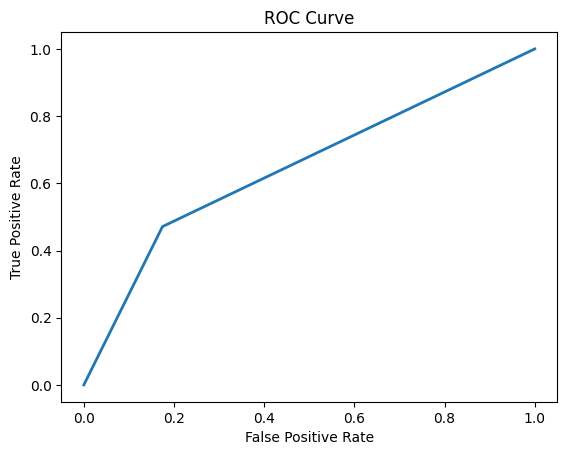

ROC AUC : 0.6484






In [22]:
for C in C_values:
    clf = svm.SVC(kernel='sigmoid', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 19. Stratified k-fold cross-validation with shuffle split with linear kernel

In [23]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
linear_svc=svm.SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=skf)
print(linear_scores)

### 21. Stratified k-fold cross-validation with shuffle split with rbf kernel

In [ ]:
rbf_svc=svm.SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=skf)
print(rbf_scores)

### 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel

In [ ]:
poly_svc=svm.SVC(kernel='poly')
poly_scores = cross_val_score(poly_svc, X, y, cv=skf)
print(poly_scores)

### 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [ ]:
sig_svc=svm.SVC(kernel='sigmoid')
sig_scores = cross_val_score(sig_svc, X, y, cv=skf)
print(sig_scores)